# Animal classification AI
# Data analysis

## TOC
- Student info
- Important note
- Special credits
- Required imports and basic setup
- Step 1: Loading the data
   - 1.a: Saving the labels
   - 1.b: Saving dictionary of file paths
- Step 2: Data analysis
   - 2.a: Distribtion of the training data
   - 2.b: A deeper look at the training data
   - 2.c: Feature extraction
   - 2.d: The numerical representation
   

## Student info
- **Name**: Bontinck Lennert
- **StudentID**: 568702
- **Affiliation**: VUB - Master Computer Science: AI

## Important note
In some codeblocks, the code might refer to variables from previous sections, in order to get accurate results code must be run top to bottom without skipping.

## Special credits
Some of the code used in this notebook is adopted or copied from the notebooks supplied in the Kaggle compition. A special thanks is given to Andries Rosseau for supplying us with this helpfull code.

## Required imports and basic setup
All required imports for this file are taken care of once using the following code block. Installing the required libraries is discussed in the README of this GitHub repository. Some basic setup for the used libraries is also taken care of here

In [1]:
# standard packages used to handle files
import sys
import os 
import glob
import time

# commonly used library for data manipulation
import pandas as pd

# numerical
import numpy as np

# handle images - opencv
import cv2

# machine learning library
import sklearn
import sklearn.preprocessing

# used to serialize python objects to disk and load them back to memory
import pickle

# plotting
import matplotlib.pyplot as plt
from matplotlib import cm as cm

# helper functions
import helpers

# specific helper functions for feature extraction
import features

# tell matplotlib that we plot in a notebook and make images high(er) resolution
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'svg'}

# used for counting files
import fnmatch

In [2]:
# datasets  location
dataset_path = '../images/'
# output location:
output_path = './'

In [3]:
# other path settings
dataset_path_train = os.path.join(dataset_path, 'train')
dataset_path_test = os.path.join(dataset_path, 'test')

features_path = os.path.join(output_path, 'features')
features_path_train = os.path.join(features_path, 'train')
features_path_test = os.path.join(features_path, 'test')

prediction_path = os.path.join(output_path, 'predictions')

# filepatterns to write out features
filepattern_descriptor_train = os.path.join(features_path_train, 'train_features_{}.pkl')
filepattern_descriptor_test = os.path.join(features_path_test, 'test_features_{}.pkl')

# create paths in case they don't exist:
helpers.createPath(features_path)
helpers.createPath(features_path_train)
helpers.createPath(features_path_test)
helpers.createPath(prediction_path)

## Step 1: Loading the data
Before we can start exploring our data and making models we have to setup everything that is needed to access the data.

The data is provided in the Kaggle compition and saved under a folder "test" and "train" inside the folder "images" which is saved in this files parent directory as set up in the previous basic setup step.

### 1.a: Saving the labels
The training data provided is saved inside a folder which name corresponds to the label of the data inside that folder. Thus getting the labels of the data is nothing more then getting all folder names inside the "train" folder.

In [4]:
train_images_folder_paths = glob.glob(os.path.join(dataset_path_train,'*'))
label_strings = np.sort(np.array([os.path.basename(path) for path in train_images_folder_paths]))
amount_of_labels = label_strings.shape[0]

print("Amount of classes (labels): ", amount_of_labels)
print("\nLabels: ", label_strings)

Amount of classes (labels):  12

Labels:  ['chicken' 'elephant' 'fox' 'german_shepherd' 'golden_retriever' 'horse'
 'jaguar' 'lion' 'owl' 'parrot' 'swan' 'tiger']


### 1.b: Saving dictionary of file paths
Since loading all images of the train set into memory at once is hardly feasible, we simply collect all their filepaths and load them on demand. Therefore, we build a dictionary of the filepaths to all our train images, sorted by label. We do the same for our test images.

In [5]:
train_paths = dict((label_string, helpers.getImgPaths(os.path.join(dataset_path_train, label_string))) 
                   for label_string in label_strings)

test_paths = helpers.getImgPaths(dataset_path_test)

## Step 2: Data analysis
Before rigorously testing different models available it's important to take a look at the data that's supplied to us. This will not only validate the data is correctly loaded in the previous step but will also give us some hint as to what our data looks like, what it's distribution is...

### 2.a: Distribtion of the training data
This part is further discussed in the report of this project, in section: Data distribution.

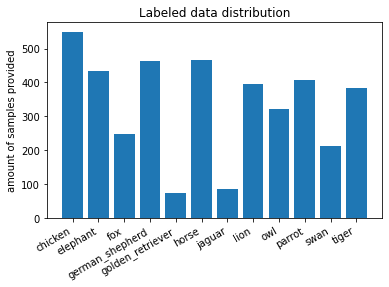

In [6]:
# retreiving data for plotting
x = np.arange(amount_of_labels)
x_heights = [len(fnmatch.filter(os.listdir(path), '[^.]*.*')) for path in train_images_folder_paths] 

# providing data to the plotting library
fig, ax = plt.subplots()
plt.bar(x, height=x_heights)

# setting up details of the graph
plt.xticks(x, label_strings)
fig.autofmt_xdate()
plt.ylabel('amount of samples provided')
plt.title('Labeled data distribution')

plt.savefig("../graphs/1/1-data_analysis-labeled_data_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

In [7]:
total_amount_of_training_imgs = np.sum(x_heights)
print('Total amount of training images: {}'.format(total_amount_of_training_imgs))

Total amount of training images: 4042


### 2.b: A deeper look at the training data
This part is further discussed in the report of this project, in section: Deeper look at the training data

<Figure size 432x288 with 0 Axes>

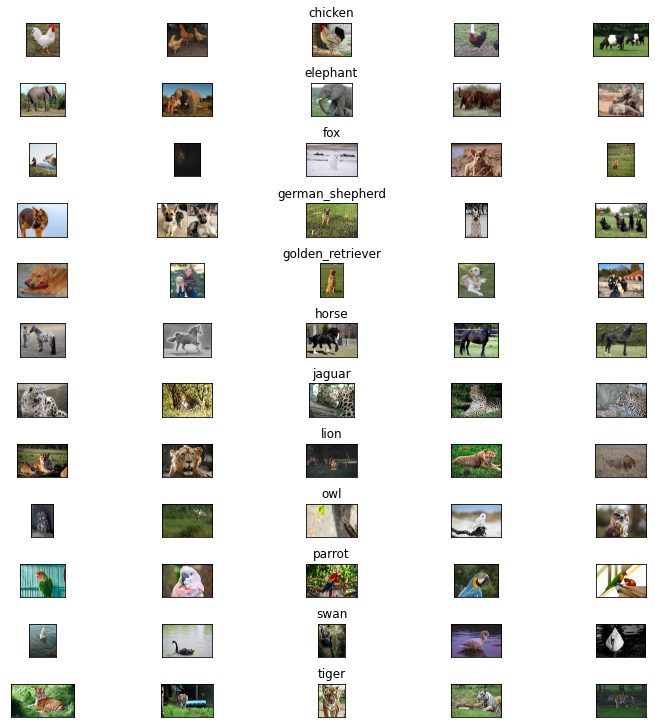

In [8]:
plt.clf()

fig, axes = plt.subplots(nrows=amount_of_labels, ncols=5, constrained_layout=True, figsize=(10, 10))

[ax.get_xaxis().set_visible(False) for ax_row in axes for ax in ax_row]
[ax.get_yaxis().set_visible(False) for ax_row in axes for ax in ax_row]

for idx, label_string in enumerate(label_strings):
    images = [cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB) for path in train_paths[label_string][:5]]

    for colidx in range(5):
        axes[idx, colidx].imshow(images[colidx])
        if colidx == 2: # if this is the center column
            axes[idx, colidx].set_title(label_string)
            


plt.savefig("../graphs/1/1-data_analysis-labeled_data_overview.png", dpi=300, bbox_inches='tight')
plt.show()

### 2.c: Feature extraction
This part is further discussed in the report of this project, in section: Feature extraction

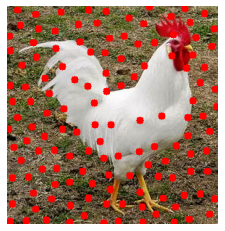

In [9]:
plt.clf()

current_image = cv2.imread(train_paths["chicken"][0])
corner_image, corner_coords = features.extractShiTomasiCorners(current_image, num_features=500, min_distance=20, visualize=True)    


plt.imshow(cv2.cvtColor(corner_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.savefig("../graphs/1/1-data_analysis-POI_chicken.png", dpi=300, bbox_inches='tight') 
plt.show()

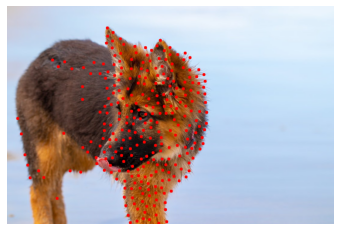

In [10]:
plt.clf()

current_image = cv2.imread(train_paths["german_shepherd"][0])
corner_image, corner_coords = features.extractShiTomasiCorners(current_image, num_features=500, min_distance=20, visualize=True)    


plt.imshow(cv2.cvtColor(corner_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.savefig("../graphs/1/1-data_analysis-POI_german_shepherd.png", dpi=300, bbox_inches='tight') 
plt.show()

### 2.d: The numerical representation
This part is further discussed in the report of this project, in section: The numerical representation

In [11]:
descriptor_desired = 'sift'

with open(filepattern_descriptor_train.format(descriptor_desired), 'rb') as pkl_file_train:
    train_features_from_pkl = pickle.load(pkl_file_train)
    
print('Number of encoded train images: {}'.format(len(train_features_from_pkl)))

with open(filepattern_descriptor_test.format(descriptor_desired), 'rb') as pkl_file_test:
    test_features_from_pkl = pickle.load(pkl_file_test)
        
print('Number of encoded test images: {}'.format(len(test_features_from_pkl)))


Number of encoded train images: 4042
Number of encoded test images: 4035


In [12]:
amount_of_clusters = 30

clustered_codebook = helpers.createCodebook(train_features_from_pkl, codebook_size=amount_of_clusters)

training took 13.280686616897583 seconds


In [13]:
# encode all train images 
train_data = []
train_labels = []

for image_features in train_features_from_pkl:
    bow_feature_vector = helpers.encodeImage(image_features.data, clustered_codebook)
    train_data.append(bow_feature_vector)
    train_labels.append(image_features.label)

In [14]:
print("Amount of points available: ", len(train_features_from_pkl[0][2]))
print("Amount of clusters requested: ", len(train_data[0]))
print("\nTrain labels: ", train_labels[:5])
print("Train data: \n", train_data[:5])

Amount of points available:  500
Amount of clusters requested:  30

Train labels:  ['chicken', 'chicken', 'chicken', 'chicken', 'chicken']
Train data: 
 [array([0.16961034, 0.15963326, 0.19954158, 0.13967911, 0.07981663,
       0.17958742, 0.11972495, 0.30928945, 0.13967911, 0.24942698,
       0.10974787, 0.17958742, 0.09977079, 0.16961034, 0.15963326,
       0.16961034, 0.11972495, 0.16961034, 0.24942698, 0.10974787,
       0.36915192, 0.19954158, 0.10974787, 0.15963326, 0.0498854 ,
       0.05986247, 0.34919777, 0.13967911, 0.08979371, 0.17958742]), array([0.06636421, 0.24333544, 0.35394246, 0.09954632, 0.08848561,
       0.26545684, 0.23227474, 0.13272842, 0.18803193, 0.07742491,
       0.16591053, 0.13272842, 0.14378912, 0.18803193, 0.12166772,
       0.27651754, 0.17697123, 0.13272842, 0.11060702, 0.08848561,
       0.07742491, 0.06636421, 0.13272842, 0.18803193, 0.07742491,
       0.0221214 , 0.12166772, 0.12166772, 0.11060702, 0.48667088]), array([0.09905499, 0.09143537, 0.03047

In [27]:
pd_data

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,Cluster 10,...,Cluster 22,Cluster 23,Cluster 24,Cluster 25,Cluster 26,Cluster 27,Cluster 28,Cluster 29,Cluster 30,target
0,0.169610,0.159633,0.199542,0.139679,0.079817,0.179587,0.119725,0.309289,0.139679,0.249427,...,0.199542,0.109748,0.159633,0.049885,0.059862,0.349198,0.139679,0.089794,0.179587,0.0
1,0.066364,0.243335,0.353942,0.099546,0.088486,0.265457,0.232275,0.132728,0.188032,0.077425,...,0.066364,0.132728,0.188032,0.077425,0.022121,0.121668,0.121668,0.110607,0.486671,0.0
2,0.099055,0.091435,0.030478,0.190490,0.754342,0.060957,0.053337,0.083816,0.060957,0.060957,...,0.083816,0.129533,0.091435,0.076196,0.099055,0.053337,0.182871,0.167632,0.030478,0.0
3,0.049408,0.069171,0.039527,0.286567,0.039527,0.049408,0.207514,0.484200,0.098816,0.177869,...,0.167988,0.108698,0.088935,0.069171,0.000000,0.148225,0.167988,0.138343,0.069171,0.0
4,0.107318,0.274257,0.107318,0.143091,0.202712,0.178863,0.238484,0.345802,0.023848,0.107318,...,0.119242,0.131166,0.107318,0.000000,0.143091,0.023848,0.298105,0.178863,0.369651,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4037,0.056205,0.018735,0.299760,0.159248,0.281025,0.084308,0.103043,0.056205,0.215453,0.281025,...,0.262290,0.112410,0.121778,0.384068,0.355965,0.084308,0.065573,0.093675,0.093675,11.0
4038,0.095950,0.297445,0.105545,0.182305,0.450965,0.163115,0.124735,0.086355,0.172710,0.143925,...,0.220685,0.153520,0.086355,0.326230,0.211090,0.057570,0.076760,0.124735,0.028785,11.0
4039,0.086771,0.134978,0.096413,0.183184,0.289238,0.077130,0.096413,0.057848,0.260314,0.173543,...,0.173543,0.134978,0.163902,0.318162,0.453140,0.096413,0.154260,0.221749,0.048206,11.0
4040,0.167075,0.009282,0.213485,0.157793,0.306305,0.009282,0.213485,0.148511,0.185639,0.213485,...,0.222767,0.194921,0.055692,0.408407,0.167075,0.055692,0.037128,0.055692,0.000000,11.0


In [30]:
#convert train labels to numerical representation
label_encoder = sklearn.preprocessing.LabelEncoder()
label_encoder.fit(label_strings)
train_labels_numerical = label_encoder.transform(train_labels)

# loading in data as PD
data_w_label = np.c_[train_data, train_labels_numerical]
feature_names = ["Cluster " + str(x + 1) for x in range(amount_of_clusters)]
columns_w_label = np.append(feature_names, ["target"])
pd_data_w_label = pd.DataFrame(data_w_label, columns=columns_w_label)

data = np.c_[train_data]
columns = ["Cluster " + str(x + 1) for x in range(amount_of_clusters)]
pd_data = pd.DataFrame(data, columns=columns)


pd_data_w_label.head()

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,Cluster 10,...,Cluster 22,Cluster 23,Cluster 24,Cluster 25,Cluster 26,Cluster 27,Cluster 28,Cluster 29,Cluster 30,target
0,0.169610,0.159633,0.199542,0.139679,0.079817,0.179587,0.119725,0.309289,0.139679,0.249427,...,0.199542,0.109748,0.159633,0.049885,0.059862,0.349198,0.139679,0.089794,0.179587,0.0
1,0.066364,0.243335,0.353942,0.099546,0.088486,0.265457,0.232275,0.132728,0.188032,0.077425,...,0.066364,0.132728,0.188032,0.077425,0.022121,0.121668,0.121668,0.110607,0.486671,0.0
2,0.099055,0.091435,0.030478,0.190490,0.754342,0.060957,0.053337,0.083816,0.060957,0.060957,...,0.083816,0.129533,0.091435,0.076196,0.099055,0.053337,0.182871,0.167632,0.030478,0.0
3,0.049408,0.069171,0.039527,0.286567,0.039527,0.049408,0.207514,0.484200,0.098816,0.177869,...,0.167988,0.108698,0.088935,0.069171,0.000000,0.148225,0.167988,0.138343,0.069171,0.0
4,0.107318,0.274257,0.107318,0.143091,0.202712,0.178863,0.238484,0.345802,0.023848,0.107318,...,0.119242,0.131166,0.107318,0.000000,0.143091,0.023848,0.298105,0.178863,0.369651,0.0


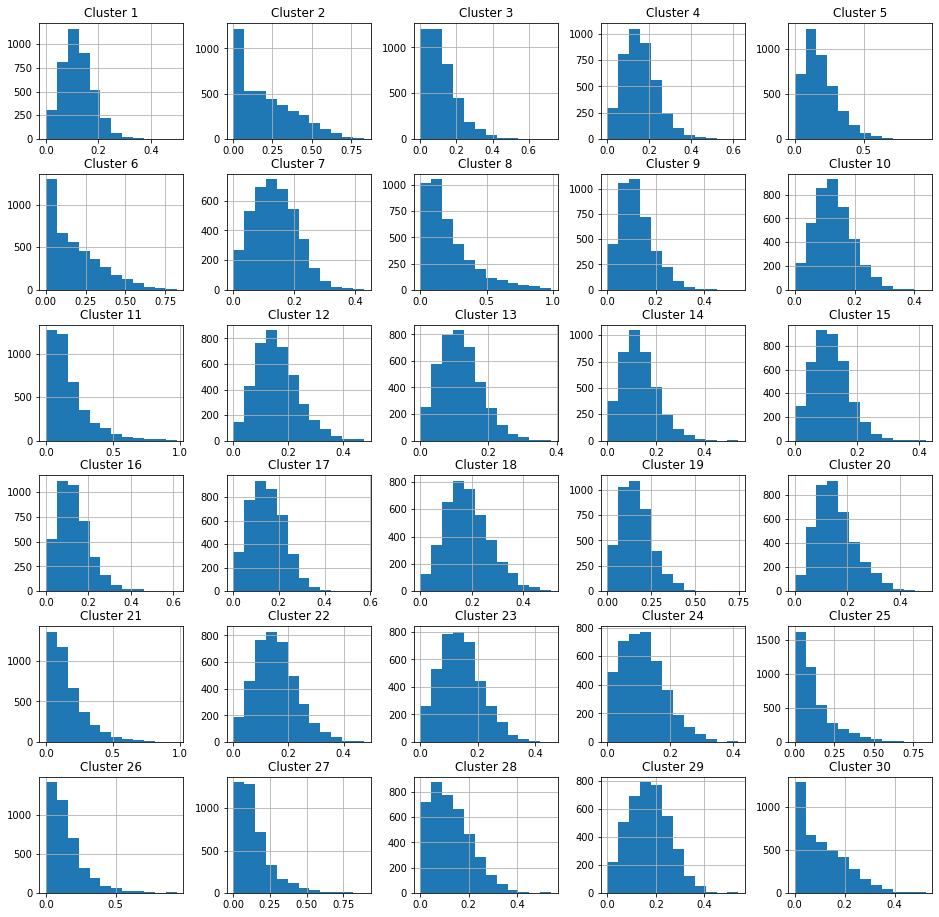

In [31]:
pd_data.hist(figsize = (16,16), bins=12) # figsize: (width,height)
plt.savefig("../graphs/1/1-data_analysis-feature_representation.png", dpi=300, bbox_inches='tight') 
plt.show()

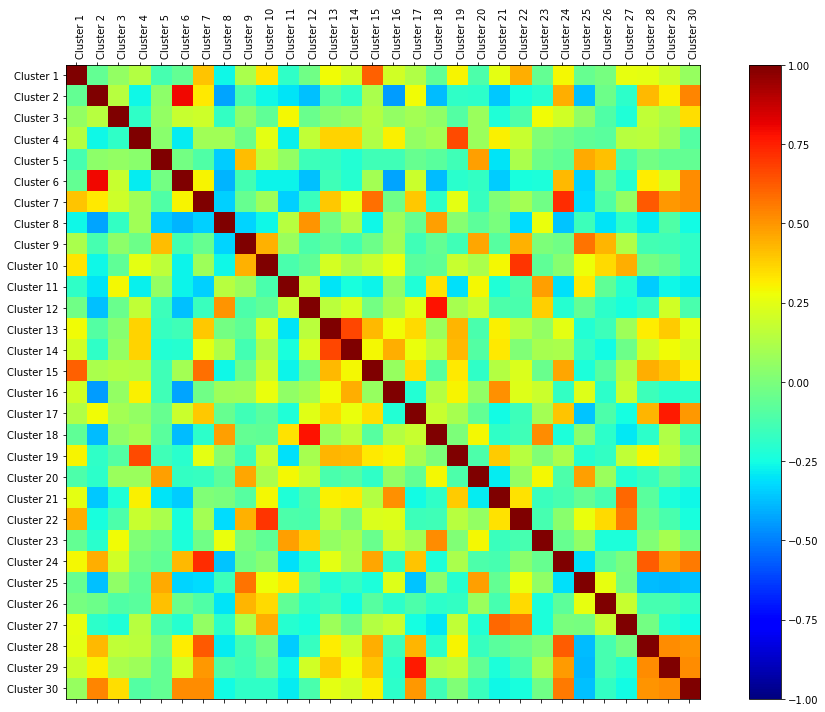

In [32]:
def plot_correlation_matrix(df):
    """Takes a pandas dataframe as input"""
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,10))
    plt.jet() # set the colormap to jet
    cax = ax.matshow(df.corr(), vmin=-1, vmax=1)

    ticks = list(range(len(df.columns)))
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)

    ax.set_xticklabels(df.columns, rotation=90, horizontalalignment='left')
    ax.set_yticklabels(df.columns)
    
    fig.colorbar(cax, ticks=[-1.0,-0.75,-0.5,-0.25,0.0,0.25,0.5,0.75,1.0])

    plt.tight_layout()
    plt.savefig("../graphs/1/1-data_analysis-correlation_matrix.png", dpi=300, bbox_inches='tight') 
    plt.show()
    
plot_correlation_matrix(pd_data)